In [1]:
#Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the data
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#look at main features
customer_df.shape

(9134, 24)

In [4]:
#look at main features
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#chaning column names to snake case

def snake_case(df):
    cols = []
    for c in df.columns:
        cols.append(c.lower())
    df.columns = cols
    cols_ = df.columns.str.replace(' ', '_')
    df.columns = cols_
    return df

customer_df = snake_case(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
#change effective to date to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#Checking for NaN values
#There are no NaN values
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# customer_num['customer_lifetime_value'].value_counts() # has a lot of distinct values
# customer_num['income'].value_counts() # lot of unique values
# customer_num['monthly_premium_auto'].value_counts() # lot of unique values
# customer_num['months_since_last_claim'].value_counts()
# customer_num['months_since_policy_inception'].value_counts()
# customer_num['number_of_open_complaints'].value_counts()
# customer_num['total_claim_amount'].value_counts()

In [9]:
#define a function that differentiates the continuous and discrete variables

def discr_cont(df):
    cat = df.select_dtypes(include=np.object)
    continuous = []
    discrete = []
    
    for c in df.select_dtypes(include=np.number):
        if len(df[c].unique()) < 10:
            discrete.append(c)
        else:
            continuous.append(c)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

print(continuous)
print(discrete)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
['number_of_open_complaints', 'number_of_policies']


/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/128697841.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include=np.object)


In [10]:
continuous_df = pd.DataFrame(data=customer_df,columns=continuous)
discrete_df = pd.DataFrame(data=customer_df,columns=discrete)

In [11]:
cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [28]:
# I checked all the column and could not detect any unexpected values
# However, some of the values have way higher value counts then other in the same column
cat['state'].value_counts()
cat['response'].value_counts()
cat['coverage'].value_counts()
cat['education'].value_counts()
cat['employmentstatus'].value_counts()
cat['gender'].value_counts()
cat['location_code'].value_counts()
cat['marital_status'].value_counts()
cat['policy_type'].value_counts()
cat['policy'].value_counts()
cat['renew_offer_type'].value_counts()
cat['sales_channel'].value_counts()
cat['vehicle_size'].value_counts()
# cat['customer'].nunique()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [13]:
# in state most two states had very little counts so I grouped them as other
def cleanstate(x):
    if x == 'Nevada':
        return 'Other'
    elif x == 'Washington':
        return 'Other'
    else:
        return x

cat['state'] = cat['state'].apply(cleanstate)

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/469782926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['state'] = cat['state'].apply(cleanstate)


In [14]:
# also eduction has Master and Doctor which have very low count, so grouping them as well
def cleaneducation(x):
    if x == 'Master':
        return 'Other'
    elif x == 'Doctor':
        return 'Other'
    else:
        return x

cat['education'] = cat['education'].apply(cleaneducation)
cat['education'].value_counts()

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/1196451065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['education'] = cat['education'].apply(cleaneducation)


Bachelor                2748
College                 2681
High School or Below    2622
Other                   1083
Name: education, dtype: int64

In [15]:
# same for employmentstatus
def cleanemployment(x):
    if x == 'Medical Leave':
        return 'Other'
    elif x == 'Disabled':
        return 'Other'
    elif x == 'Retired':
        return 'Other'
    else:
        return x

cat['employmentstatus'] = cat['employmentstatus'].apply(cleanemployment)

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/2128196564.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['employmentstatus'] = cat['employmentstatus'].apply(cleanemployment)


In [16]:
#the column policy, has values like Corporate L1,L2,L3 I am going to change that to 1 name: Corporate
def cleanpolicy(x):
    if 'Corporate' in x:
        return 'Corporate'
    elif 'Personal' in x:
        return 'Personal'
    elif 'Special' in x:
        return 'Special'
    
cat['policy'] = cat['policy'].apply(cleanpolicy)

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/1677784809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['policy'] = cat['policy'].apply(cleanpolicy)


In [17]:
#Get categorical features
categorical_features = pd.concat([cat, discrete_df], axis=1)
categorical_features.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints,number_of_policies
0,BU79786,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize,0,1


In [18]:
# what do we do with the customer ID column?
# I will drop them before the further analysis and building of prediction models, as they are a unique primary key
# for that reason they will not have any information to influence the analysis but are merely the identifier. 
# This is very important to have though once we have the predictions or want to link our findings to specific customers
# at this point, so after analysis, I will add the CustomerID column back to the dataframe, to have everything complete

## Start of the feature extraction lab

In [20]:
#Open the categoricals
#dropping customer ID as discussed in the previous lab, it will make the analysis noisy and is only used to identify
categorical = categorical_features.drop(['customer','number_of_open_complaints','number_of_policies'],axis=1)
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize


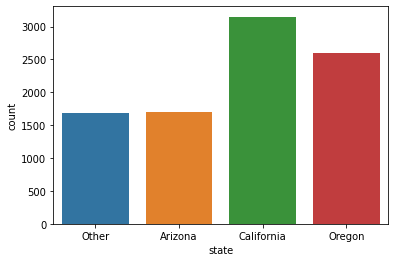

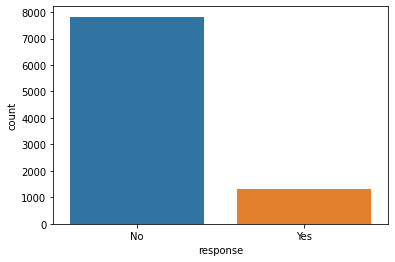

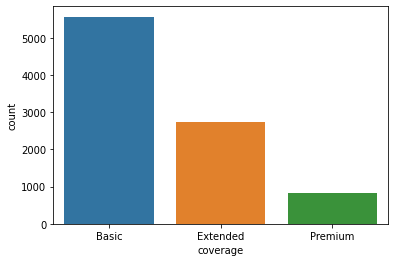

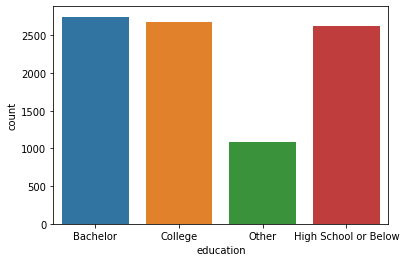

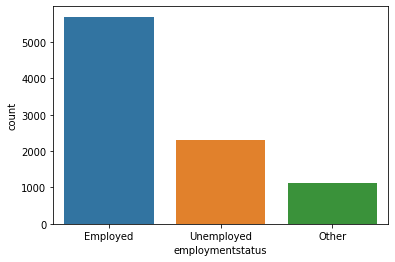

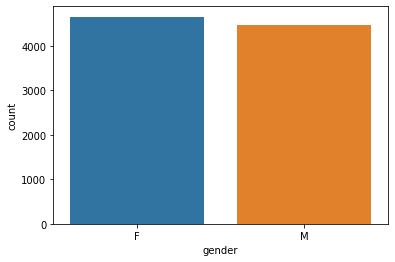

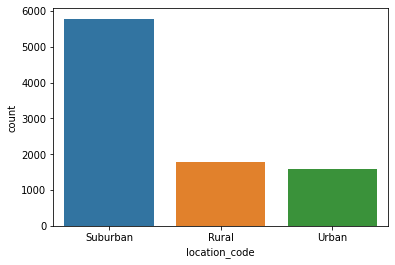

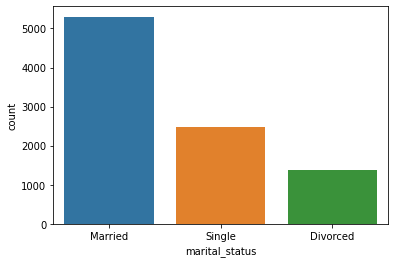

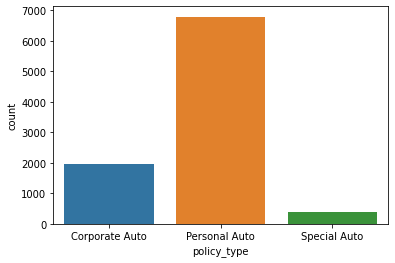

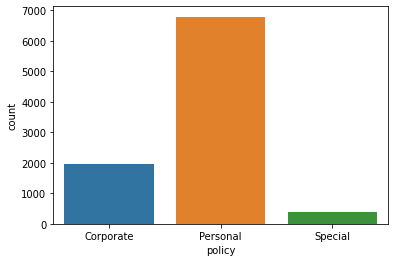

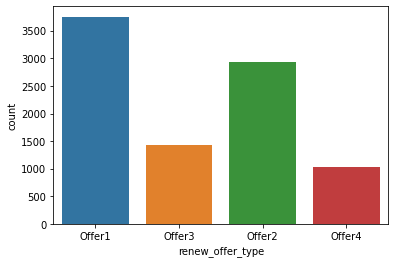

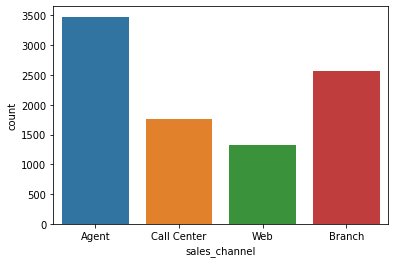

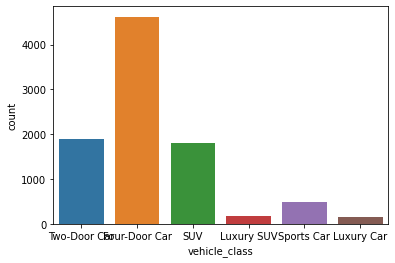

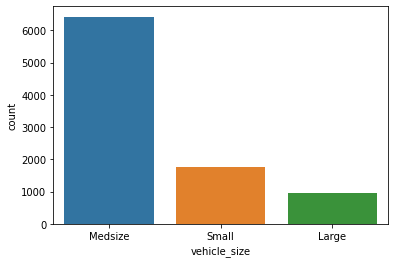

In [21]:
# I already cleaned a lot of data in the previous lab, combining low counts together in an other 'column'
# however I did find that I missed one, so dealing with the column here: vehicle class 
# Also it looks like policy and policy_type are similair columns, investigating that in the cells below
def countplot_cat(df):
    for c in df:
        sns.countplot(x=c, data=df)
        plt.show()
    return None

countplot_cat(categorical)

In [24]:
#checking if policy and policy_type have the same values:
print(categorical['policy_type'].value_counts())
print(categorical['policy'].value_counts())


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64


In [25]:
# above shows the values are exactly the same, so I am going to drop policy_type
categorical = categorical.drop(['policy_type'],axis=1)

In [31]:
categorical['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [32]:
#cleaning vehicle class because there are a few values with very low counts
def cleanvehicleclass(x):
    if x == 'Sports Car':
        return 'Other'
    elif x == 'Luxury SUV':
        return 'Other'
    elif x == 'Luxury Car':
        return 'Other'
    else:
        return x
    
categorical['vehicle_class'] = categorical['vehicle_class'].apply(cleanvehicleclass)

In [33]:
categorical['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Other             831
Name: vehicle_class, dtype: int64

In [46]:
#Plot the time variable
#To get useful information from the effective to date column, we should transform the dates to days weeks, months and years
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.week
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['year'] = customer_df['effective_to_date'].dt.year

/var/folders/ds/zk5fgzhx7b53nll390cs5phh0000gn/T/ipykernel_11769/2014186878.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  customer_df['week'] = customer_df['effective_to_date'].dt.week


In [48]:
# Since all the dates are in 2011, this is not going to give us any interesting info. Dropping this column for that reason
customer_df['year'].unique()

array([2011])

In [52]:
#customer_df = customer_df.drop(['year'],axis=1)

In [57]:
customer_df['effective_to_date'].unique()

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

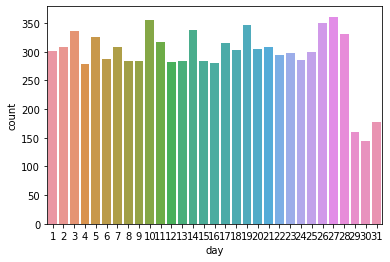

In [56]:
sns.countplot(x='day', data=customer_df)
plt.show()

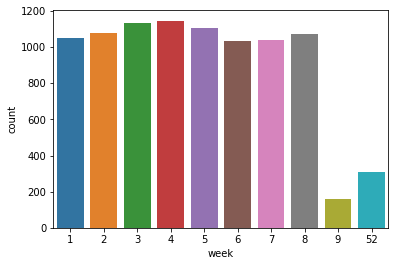

In [54]:
sns.countplot(x='week', data=customer_df)
plt.show()

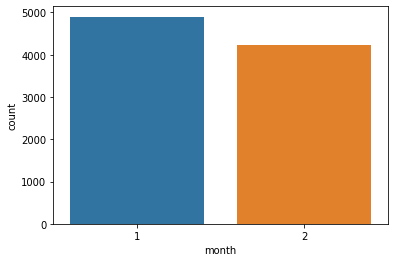

In [55]:
sns.countplot(x='month', data=customer_df)
plt.show()

In [ ]:
#The above plots show that majority of the policies become active during the whole month, with a considerable dip in the last 3 days of the months
#Would be interesting to have conversations with Sales team to see what makes their results go down at the end of the month
#Company could think about incentives to motivate the Sales Team to sell new policies in the last few days of the month too

#New policies became effective equally divided over the 2 months of which we have date as you can see in the week and month plots. 
#Interestingly there are also to policies that become active in week 52, which has to be an error in the transformation as the .unique() functions only shows values in Jan and Feb
#It's hard to derive any long term information on this dataset as it only shows us info over 2 months.
#However we can already look at ways to increase sales in the last few days of the months, as the sales teams are cleary leaving opportunities here 